964.4328365447116
966.7739994082975


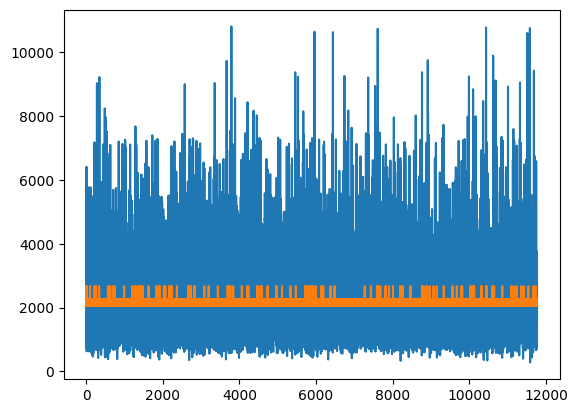

In [ ]:
import pandas as pd
import numpy as np
from joblib import dump
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC

df = pd.read_csv('laptop_prices.csv')
df.drop(['Brand', 'Processor', 'RAM (GB)', 'Storage', 'GPU', 'Resolution', 'Operating System'], axis = 1, inplace = True) #fazer label encoder
df.dropna(inplace=True)

Y = df['Price ($)']
X = df.drop('Price ($)', axis = 1)

pca = PCA(n_components = 'mle') #decide o melhor número de forma automatizada
pca.fit(X)
X = pca.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15,
random_state=42)

pipeline = Pipeline ([
    ('scaler', StandardScaler()),
    ('regressor', tree.DecisionTreeRegressor(random_state=100)),
    # ('classifier', HistGradientBoostingClassifier(max_iter=100)),
    # ('classifier', SVC()),
    # ('classifier', RandomForestClassifier()),
    # ('classifier', KNeighborsClassifier()),
])

parameters = {
    #Decision Tree
    'regressor__max_depth' : [2, 3, 4],
    'regressor__min_samples_split' : [0.5, 2],
    'regressor__min_samples_leaf': [5, 6, 7],  
    'regressor__max_features': [None],

    # #Gradient Boosting
    # 'regressor__max_depth' : [16, 17, 18, 19],
    # 'regressor__min_samples_leaf' : list(range(2, 10)),
    # 'regressor__learning_rate' : list(range(1, 5)),

    # #SVC
    # 'regressor__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    # 'regressor__degree' : list(range(2, 5)),

    # #Random Forest
    # 'regressor__max_depth' : [18, 19, 20],
    # 'regressor__min_samples_split' : [9, 10, 11],

    # #KNeighbours
    # 'regressor__n_neighbors': [3, 4, 5, 6],
    # 'regressor__algorithm': ['auto'],
    # 'regressor__leaf_size': [1],
}

model = GridSearchCV(
    pipeline,
    parameters,
    n_jobs = 3
)

model.fit(X_train, Y_train)

print(mean_absolute_error(Y_test, model.predict(X_test)))
print(mean_absolute_error(Y_train, model.predict(X_train)))

Ypred = model.predict(X)
plt.plot(Y)
plt.plot(Ypred)
plt.show()

In [37]:
print(model.best_params_)

{'regressor__max_depth': 2, 'regressor__max_features': None, 'regressor__min_samples_leaf': 6, 'regressor__min_samples_split': 0.5}
